In [1]:
import os
import sys
import pprint

import pandas as pd
import numpy as np

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [55]:
#
# Grab data in pyspark dataframe
#

# I made a 'data' dir (not checked in) at the same level as this 'notebooks' dir for exploratory data
#stock_input_path = "../data/VOO_max_stock_metrics.parquet"
#stock_input_path = "/Users/seanseamonds/Dev/stock_data_temp/VOO_1d_historical.parquet"
#stock_input_path = "/Users/seanseamonds/Dev/stock_data_temp/VOO_1d_historical.parquet"
#stock_input_path = "/Users/seanseamonds/Downloads/VOO_1d_historical.parquet"
#stock_input_path = "/Users/seanseamonds/Dev/stock_data_temp/VOO_1d_closing_data_cleaned.parquet"
#stock_input_path = "/Users/seanseamonds/Downloads/VOO_1d_closing_data_cleaned (2).parquet"
#stock_input_path = "/Users/seanseamonds/Dev/git/github/stock_data_tracker/data/VOO_1mo_stock_metrics.parquet"
stock_input_path = "/Users/seanseamonds/Downloads/VOO_3mo_stock_metrics.parquet"

df = pd.read_parquet(stock_input_path)

In [56]:
df.dtypes

dividends_filled     float64
close                float64
volume                 Int64
moving_avg_20        float64
moving_avg_60        float64
moving_avg_200       float64
div_yield_rolling    float64
dtype: object

In [59]:
#
# Quick view, stats, etc
#

df.head(100)
#df.describe()
#df.dtypes
#df.count()

,dividends_filled,close,volume,moving_avg_20,moving_avg_60,moving_avg_200,div_yield_rolling
Date,,,,,,,
2024-07-29,1.639,499.144867,3096200,NaN,NaN,NaN,0.0131
2024-07-30,1.639,496.532990,3817800,NaN,NaN,NaN,0.0132
2024-07-31,1.639,504.358612,5367600,NaN,NaN,NaN,0.0130
2024-08-01,1.639,497.480042,6939200,NaN,NaN,NaN,0.0132
2024-08-02,1.639,488.388367,8561200,NaN,NaN,NaN,0.0134
...,...,...,...,...,...,...,...
2024-10-22,NaN,536.159973,3366600,529.46,513.24,NaN,NaN
2024-10-23,NaN,531.270020,5227800,529.83,513.82,NaN,NaN
2024-10-24,NaN,532.469971,4477800,530.15,514.29,NaN,NaN


In [43]:
#
# Pandas plotting setup
#
pd.options.plotting.backend = 'matplotlib'
pd.set_option('plotting.backend', 'matplotlib')

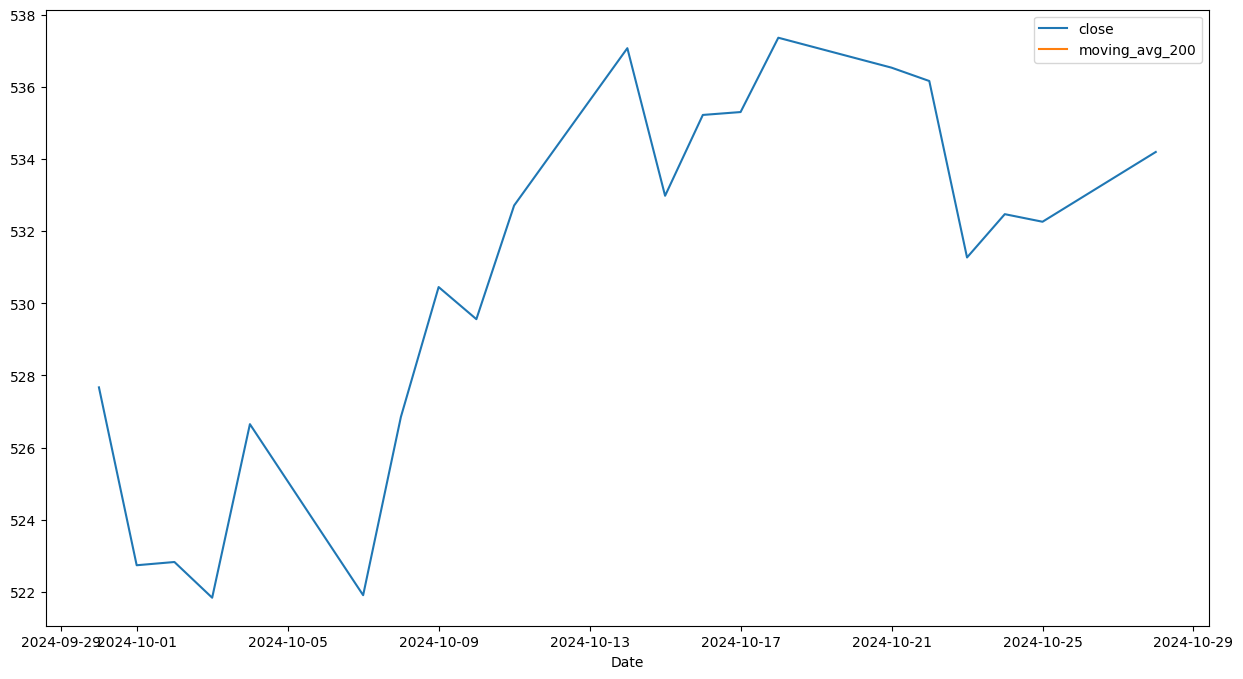

In [44]:
#
# Line graph columns over time
#
cols_to_plot = ['close', 'moving_avg_200']

df_plot = df[cols_to_plot]

# axs is a numpy.ndarray of matplotlib.axes._axes.Axes
fig, axs = plt.subplots(1)

# figure level settings
fig.set_size_inches((15, 8))

plt.xlabel('Date')

axs.plot(df_plot.index, 
         df_plot[cols_to_plot]
)
axs.legend(cols_to_plot)

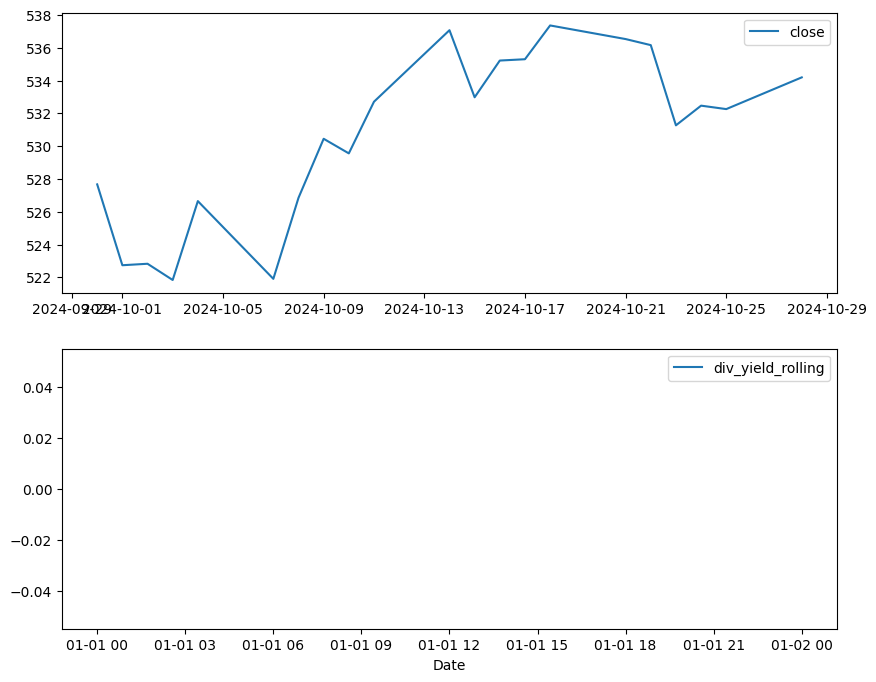

In [45]:
#
# plot multiple combos of columns, side by side for comparison
#

# specify number of subplots, allows to refer to them in an indexed manner
fig, axs = plt.subplots(2)

# set x label once as it's the same values/range
plt.xlabel('Date')

# figure level settings
fig.set_size_inches((10, 8))

# Using plt.plot() seems to keep previous info, It was values from both datasets on the same axis
# Using axs seems to treat each subplot separately, but also seems to look at the overall range 
#   of all the data sets in building it's Y axis

# Plot 1
plot_cols = ['close']
axs[0].plot(df.index, df[plot_cols]
)
axs[0].legend(plot_cols)

# Plot 2
plot_cols = ['div_yield_rolling']
axs[1].plot(df.index, df[plot_cols]
)
axs[1].legend(plot_cols)

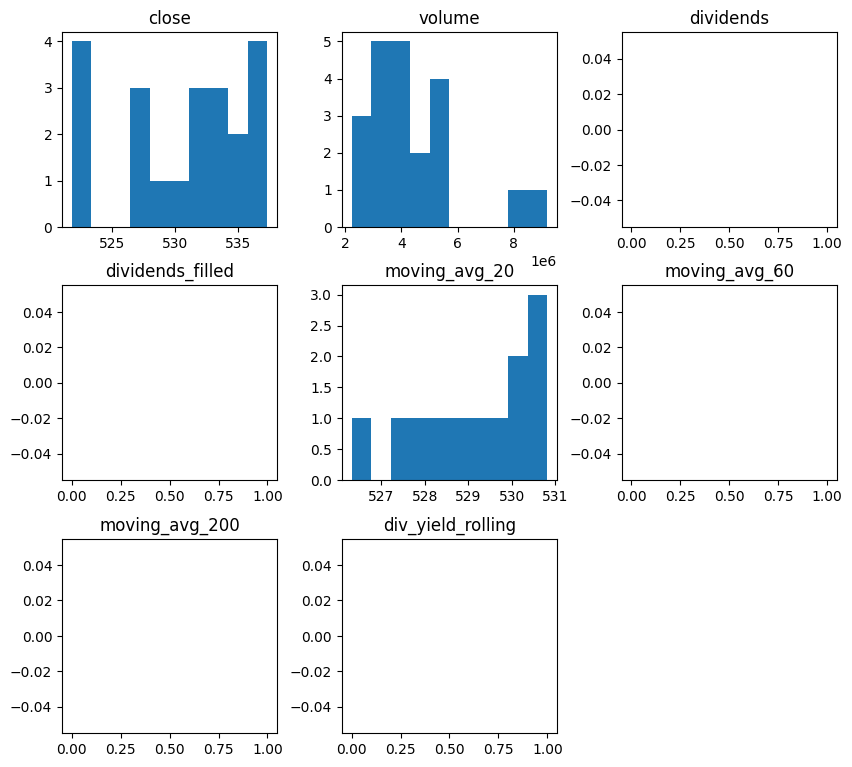

In [46]:
#
# Histograms
#

# ";" here keeps extraneous info from printing
df.hist(grid=False, layout=(20,3), figsize=(10,65));

<Axes: >

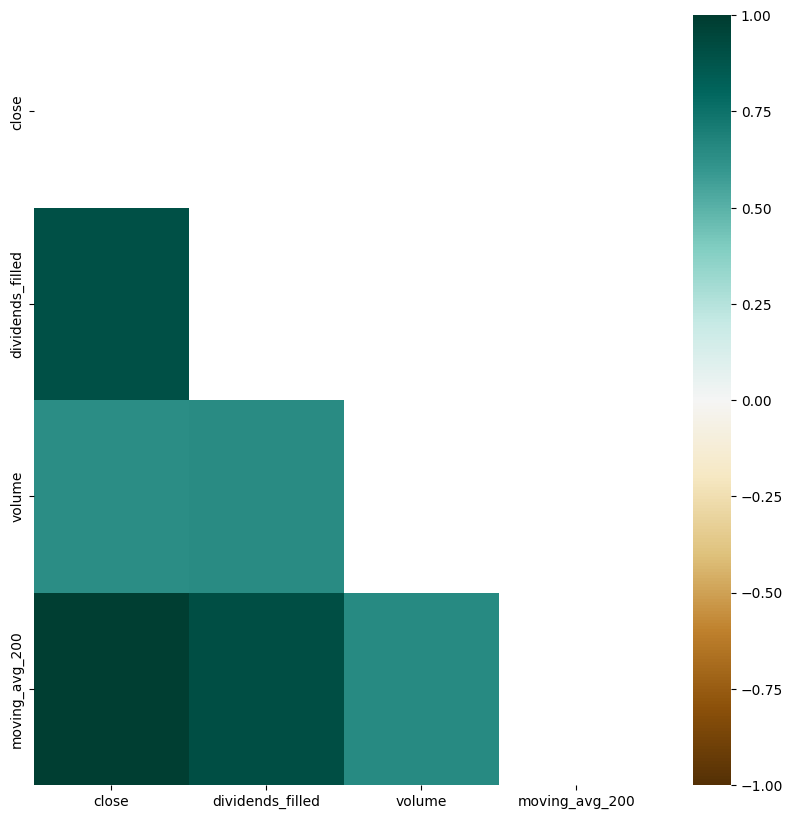

In [21]:
#
# Correlation matrix
#
cols_to_correlate = ['close', 'dividends_filled', 'volume', 'moving_avg_200']

corr = df[cols_to_correlate].corr()

# Generate a mask to avoid showing the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='BrBG', vmin=-1, vmax=1)